# Yoseph Yan, ypy4, February 8, 2024, Intelligent Autonomous Systems

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import label, regionprops
import os

In [2]:
# Algorithm to find the orange cones in images
def myAlgorithm(folder, filename, cluster):
    # Opens the image
    imagepath = os.path.join(folder, filename)
    image = io.imread(imagepath)

    # Loads the parameters
    meanpath = 'parameters/means.npy'
    covpath = 'parameters/covars.npy'
    wpath = 'parameters/ws.npy'
    means = np.load(meanpath)
    covars = np.load(covpath)
    weight = np.load(wpath)
    
    # Used equations mentioned in lecture
    xminusmu = image.reshape(image.shape[0], image.shape[1], 1, 3) - means.reshape(1, 1, cluster, 3)
    g = np.exp(-0.5 * ((xminusmu.reshape(xminusmu.shape[0], xminusmu.shape[1], cluster, 1, 3) @ np.array([np.linalg.inv(covar) for covar in covars])).reshape(xminusmu.shape[0], xminusmu.shape[1], cluster, 3) * xminusmu).sum(axis=3)) / ((2 * np.pi) ** 1.5 * np.sqrt(np.array([np.linalg.det(covars[i, :, :].reshape(3, 3)) for i in range(cluster)])))
    prob = np.sum(g * weight, axis=2)
    
    # Create a binary image and then solidify
    binaryimg = 255 * (prob > 0.2)
    onearray = np.ones((6, 6), 'uint8')
    binaryimg = cv2.dilate(np.uint8(binaryimg), onearray)
    
    # Prints image
    plt.imshow(binaryimg)
    plt.show()
    
    # Create a label
    labelled = label(binaryimg)
    
    # Create a bounding box and calculates distance
    for region in regionprops(labelled):
        a, b, c, d = region.bbox
        cv2.rectangle(image, (b, a), (d, c), (0, 255, 0), 3)
        distance = ((425 / np.abs(b - d)) + (963 / np.abs(a - c))) / 2
        plt.imshow(image)
        plt.show()
        print(f"ImageName: {filename}, Down: {c}, Right: {(b + d) / 2}, Distance: {distance}")
        
    with open('ypy4_results.txt', 'a') as file:
        file.write(f"ImageName: {filename}, Down: {c}, Right: {(b + d) / 2}, Distance: {distance}\n")

test_3.png


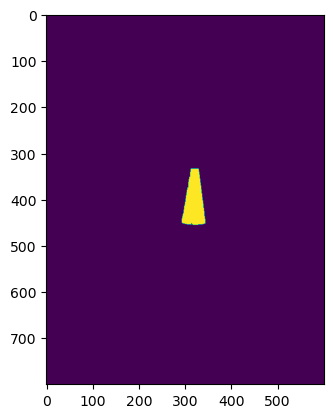

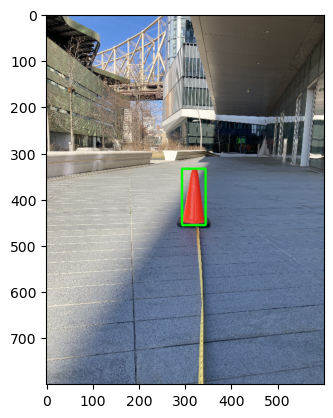

ImageName: test_3.png, Down: 456, Right: 318.5, Distance: 8.113387978142077
test_2.png


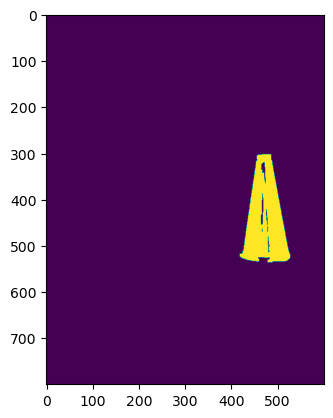

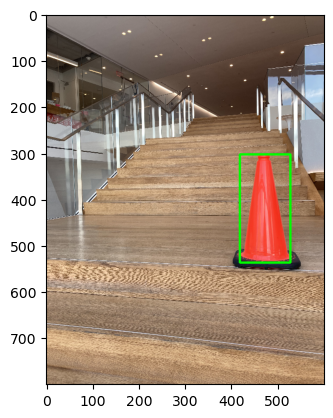

ImageName: test_2.png, Down: 537, Right: 472.5, Distance: 4.007233592095977
test_1.png


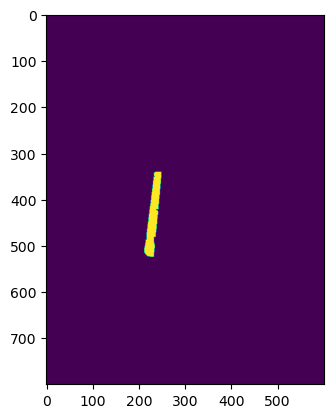

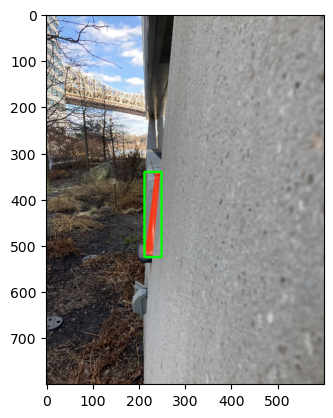

ImageName: test_1.png, Down: 525, Right: 230.5, Distance: 8.360091069330199
test_5.png


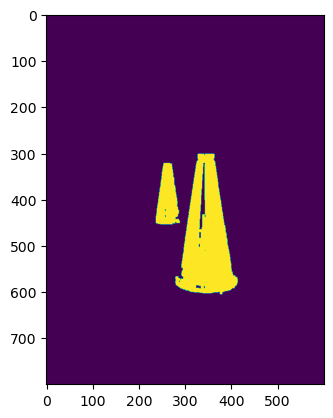

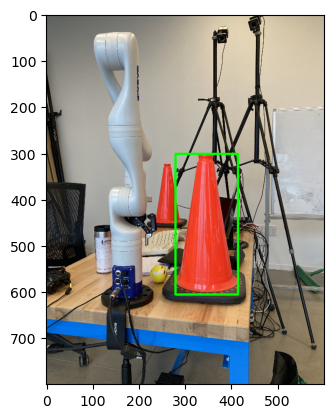

ImageName: test_5.png, Down: 606, Right: 346.5, Distance: 3.1579556530214425


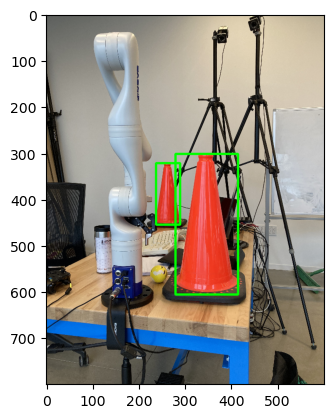

ImageName: test_5.png, Down: 455, Right: 263.0, Distance: 7.706839213418161
test_4.png


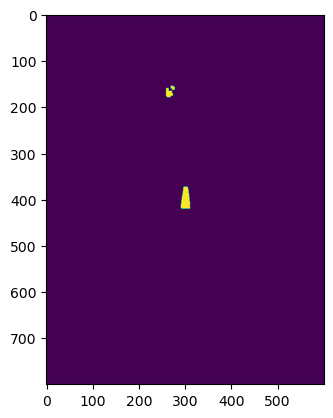

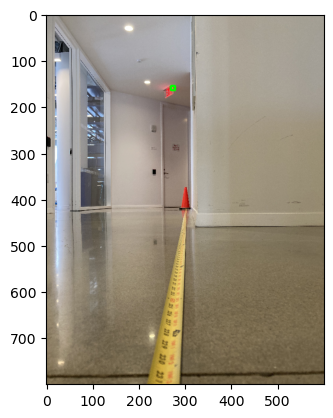

ImageName: test_4.png, Down: 164, Right: 273.5, Distance: 77.11111111111111


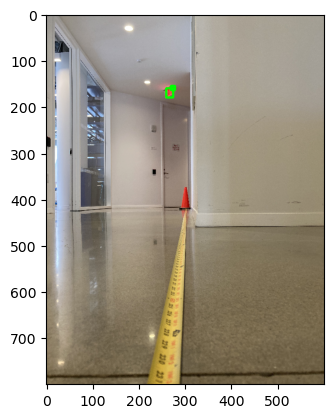

ImageName: test_4.png, Down: 180, Right: 266.5, Distance: 38.24166666666667


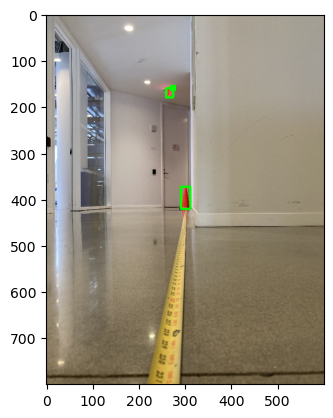

ImageName: test_4.png, Down: 421, Right: 301.0, Distance: 20.65625


In [4]:
folder = 'Proj1TestImages'
for filename in os.listdir(folder):
    print(filename)
    myAlgorithm(folder, filename, 3)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()